# Heart-Diseases Prediction using Logistic regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

In [2]:
url = "https://raw.githubusercontent.com/GauravPadawe/Framingham-Heart-Study/master/framingham.csv"
disease_df = pd.read_csv(url)
disease_df.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
disease_df.drop(columns= ['education'],inplace = True, axis = 1)

#### Explanation of `disease_df.drop(columns=['education'], inplace=True, axis=1)`

| Part                    | Meaning                                                                                                         |
|-------------------------|-----------------------------------------------------------------------------------------------------------------|
| `disease_df`            | The DataFrame you're working with (which has the Framingham data).                                              |
| `drop(...)`             | A **Pandas method** used to remove rows or columns from a DataFrame.                                            |
| `columns=['education']` | Specifies that you're dropping the **column** named `"education"`.                                              |
| `inplace=True`          | Makes the change **directly to `disease_df`** — it doesn't return a new DataFrame, it modifies the current one. |
| `axis=1`                | Tells Pandas you're removing a **column** (not a row). `axis=0` means rows, `axis=1` means columns.             |


In [4]:
disease_df.rename(columns={'male': 'Sex_male'}, inplace = True)

| `dropna(...)`         | A **Pandas method** used to **remove missing values** (NaNs) from the DataFrame.                         |

In [5]:
disease_df.dropna(axis =0, inplace = True)
disease_df

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


| `TenYearCHD`               | A specific **column** in the DataFrame (here, the target variable indicating heart disease).    |
| `.value_counts()`          | A Pandas method that counts how many times **each unique value** appears in the column.         |

In [6]:
print(disease_df.TenYearCHD.value_counts())

# This means:
    # 3500 people did not get heart disease in 10 years (0)
    # 740 people did get heart disease in 10 years (1)


TenYearCHD
0    3179
1     572
Name: count, dtype: int64


In [7]:
disease_df.columns = disease_df.columns.str.strip()
X = np.asarray(disease_df[['age','Sex_male', 'cigsPerDay', 'totChol', 'sysBP', 'glucose']])

y = np.asarray(disease_df['TenYearCHD'])

X =preprocessing.StandardScaler().fit(X).transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y,test_size=0.3, random_state = 4)

print ('Train set :' , X_train.shape, y_train.shape)
print ('Test set :', X_test.shape, y_test.shape)


Train set : (2625, 6) (2625,)
Test set : (1126, 6) (1126,)


#### Explanation of `X = np.asarray(disease_df[['age', 'Sex_male', 'cigsPerday', 'totChol', 'sysBP', 'glucose']])`

| Part                             | Meaning                                                                                           |
|---------------------------------|-------------------------------------------------------------------------------------------------|
| `disease_df`                    | The DataFrame with your dataset (Framingham data).                                              |
| `[['age', 'Sex_male', ...]]`    | Selects **multiple columns** from the DataFrame as a smaller DataFrame or subset.               |
| `np.asarray(...)`               | Converts the selected DataFrame slice into a **NumPy array** (a numerical matrix).              |
| `X =`                          | Assigns this NumPy array to the variable `X` for further use, typically as input features in ML.|

📌 In simple terms:  
This line extracts the columns `age`, `Sex_male`, `cigsPerday`, `totChol`, `sysBP`, and `glucose` from your data and turns them into a numeric array called `X`.  
This array is usually the **input features** you feed into a machine learning model.




| Part             | Meaning                                                                                                   |
|------------------|-----------------------------------------------------------------------------------------------------------|
| `preprocessing`  | The scikit-learn module for data preprocessing tools.                                                     |
| `StandardScaler()`| A class that **standardizes features** by removing the mean and scaling to unit variance.                 |
| `.fit(X)`        | Learns the **mean and standard deviation** of each feature (column) in the data `X`.                      |
| `.transform(X)`  | Applies the **scaling**: subtracts the mean and divides by the std deviation for each feature, centering them. |



### Explanation of Train-Test Split

| Part                                                   | Meaning                                                                                        |
|--------------------------------------------------------|------------------------------------------------------------------------------------------------|
| `from sklearn.model_selection import train_test_split` | Imports the `train_test_split` function from scikit-learn. It is used to split your dataset.   |
| `train_test_split(X, y, ...)`                          | Splits the feature matrix `X` and target vector `y` into training and testing sets.            |
| `test_size=0.3`                                        | 30% of the data will be used for testing, and 70% for training.                                |
| `random_state=4`                                       | Sets a fixed seed for randomness, ensuring the same split happens every time you run the code. |
| `X_train`, `X_test`                                    | `X_train`: training input features<br>`X_test`: testing input features.                        |
| `y_train`, `y_test`                                    | `y_train`: target values (labels) for training<br>`y_test`: target values for testing.         |
 



 # EDA on a Heart Disease Dataset

C:\Users\USER\AppData\Local\Temp\ipykernel_2420\2900273174.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( x= 'TenYearCHD',data = disease_df, palette= "BuGn_r")


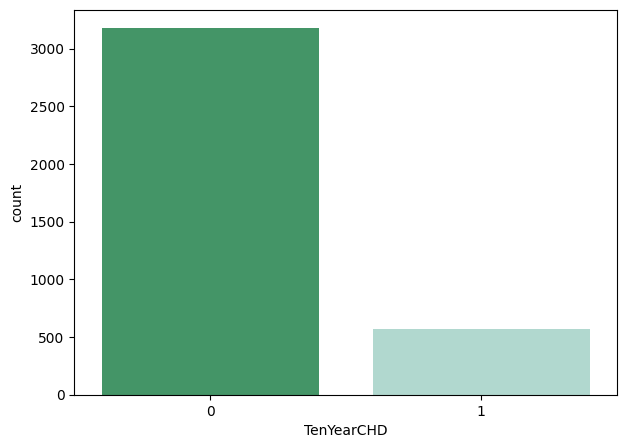

In [8]:
plt.figure(figsize=(7,5))

sns.countplot( x= 'TenYearCHD',data = disease_df, palette= "BuGn_r")

plt.show()

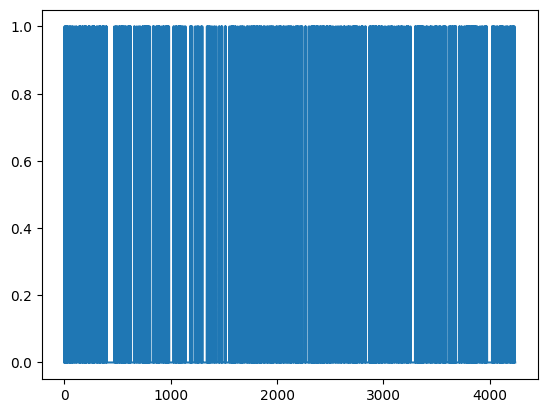

In [9]:
laste = disease_df['TenYearCHD'].plot()
plt.show(laste)

# blue bars: Indicate the absence of heart disease
# white space(gaps): represents the presence of heart disease

In [10]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

| Line of Code                                          | Explanation                                                                                      |
| ----------------------------------------------------- | ------------------------------------------------------------------------------------------------ |
| `from sklearn.linear_model import LogisticRegression` | Imports the Logistic Regression model from scikit-learn.                                         |
| `logreg = LogisticRegression()`                       | Creates an instance of the Logistic Regression model with default settings.                      |
| `logreg.fit(X_train, y_train)`                        | Trains (fits) the model on the training data (`X_train`, `y_train`).                             |
| `y_pred = logreg.predict(X_test)`                     | Uses the trained model to predict the target values (`y_pred`) for the test features (`X_test`). |


# Evaluating Logistic Regression Model

In [11]:
from sklearn.metrics import accuracy_score
print('Accuracy of the model is =', accuracy_score(y_test, y_pred))

Accuracy of the model is = 0.8490230905861457


| Line of Code                                 | Explanation                                                                                                                                       |
| -------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------- |
| `from sklearn.metrics import accuracy_score` | Imports the function used to calculate the **accuracy** of the model's predictions.                                                               |
| `accuracy_score(y_test, y_pred)`             | Compares the predicted values (`y_pred`) with the actual values (`y_test`) and computes the **accuracy** — the proportion of correct predictions. |
| `print(...)`                                 | Displays the accuracy score in a readable format.                                                                                                 |


# Plotting Confusion Matrix

The details for confusion matrix is = 
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       951
           1       0.61      0.08      0.14       175

    accuracy                           0.85      1126
   macro avg       0.73      0.54      0.53      1126
weighted avg       0.82      0.85      0.80      1126



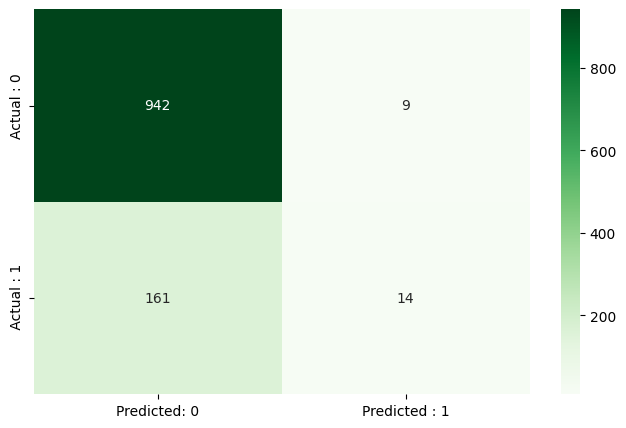

In [13]:
from sklearn.metrics import confusion_matrix, classification_report

print('The details for confusion matrix is = ')

print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data =cm, columns =['Predicted: 0','Predicted : 1'], index = ['Actual : 0',' Actual : 1'])

plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt ='d', cmap ="Greens")

plt.show()

## 🔍 Explanation of Confusion Matrix and Classification Report Code

```python
from sklearn.metrics import confusion_matrix, classification_report
```
✅ **This line imports two useful functions** from `sklearn.metrics`:  
- `confusion_matrix`: to create a confusion matrix showing prediction performance.  
- `classification_report`: to show precision, recall, F1-score, and accuracy.

---

```python
print('The details for confusion matrix is = ')
```
🖨️ **Prints a simple message** to let the user know that the classification report is coming next.

---

```python
print(classification_report(y_test,y_pred))
```
📊 **Displays a detailed classification report** for your model:  
- `y_test`: the actual (true) labels.  
- `y_pred`: the labels predicted by your model.  
This report includes:
- **Precision**: How many predicted positives are actually positive  
- **Recall**: How many actual positives your model correctly identified  
- **F1-score**: Harmonic mean of precision and recall  
- **Support**: Number of true samples in each class

---

```python
cm = confusion_matrix(y_test, y_pred)
```
🧮 **Creates a confusion matrix** using actual and predicted labels.  
This matrix shows how many values were correctly and incorrectly classified for each class.

---

```python
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted: 0','Predicted : 1'], index = ['Actual : 0',' Actual : 1'])
```
📋 **Converts the confusion matrix into a readable table (DataFrame)** using `pandas`.  
- `columns`: Labels for predicted classes  
- `index`: Labels for actual classes  
This makes it easier to display and interpret in a heatmap.

---

```python
plt.figure(figsize = (8, 5))
```
🖼️ **Creates a new figure** for the heatmap with a specific size (8 inches wide, 5 inches tall).

---

```python
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")
```
🌡️ **Plots the confusion matrix as a heatmap** using Seaborn:
- `conf_matrix`: The data to plot  
- `annot=True`: Show the actual numbers in each cell  
- `fmt='d'`: Format numbers as integers  
- `cmap="Greens"`: Use a green color gradient

---

```python
plt.show()
```
📢 **Displays the heatmap plot** so that it appears in your notebook output.

---

This block of code helps you **evaluate how well your classification model is performing**, both with numeric metrics and a visual representation of prediction accuracy.
